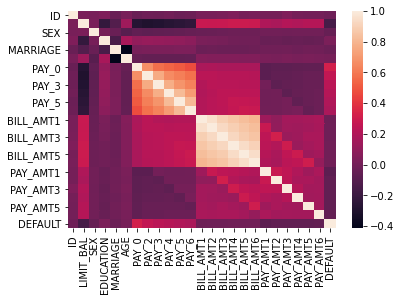

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 30 23:18:04 2021

@author: chint
"""

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import time

df=pd.read_csv('D:/UIUC_courses/IE517/IE517_FY21_HW6/ccdefault.csv')
corr_mat=df.corr()
sns.heatmap(corr_mat)
plt.show()
df2=df.values
X=df2[:,:-1]
y=df2[:,-1]
score=[]
score1=[]
f1=[]
p_score=[]
recall=[]
toc=[]
x_ax=[]

In [2]:
mult=10
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
    clf = RandomForestClassifier(n_estimators=mult*i, max_depth=None, random_state=0)
    skf = StratifiedKFold(n_splits=10)
    tic=time.time()
    score1.append(cross_val_score(clf, X_train, y_train, cv=skf))
    toc.append(time.time()-tic)
    x_ax.append(mult*i)
    print('mean accuracy with stratified k fold for n_estimators=',str(mult*i),'is:',str(np.mean(score1)))

mean accuracy with stratified k fold for n_estimators= 10 is: 0.8063333333333332
mean accuracy with stratified k fold for n_estimators= 20 is: 0.8094259259259259
mean accuracy with stratified k fold for n_estimators= 30 is: 0.8113333333333334
mean accuracy with stratified k fold for n_estimators= 40 is: 0.8123888888888888
mean accuracy with stratified k fold for n_estimators= 50 is: 0.8131111111111111
mean accuracy with stratified k fold for n_estimators= 60 is: 0.813716049382716
mean accuracy with stratified k fold for n_estimators= 70 is: 0.8143015873015873
mean accuracy with stratified k fold for n_estimators= 80 is: 0.8146759259259259
mean accuracy with stratified k fold for n_estimators= 90 is: 0.8149465020576132
mean accuracy with stratified k fold for n_estimators= 100 is: 0.8151592592592594


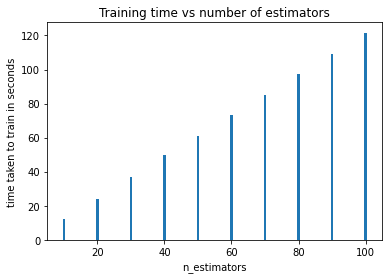

In [3]:
plt.bar(x_ax,toc)
plt.xlabel('n_estimators')
plt.ylabel('time taken to train in seconds')
plt.title('Training time vs number of estimators')
plt.show()

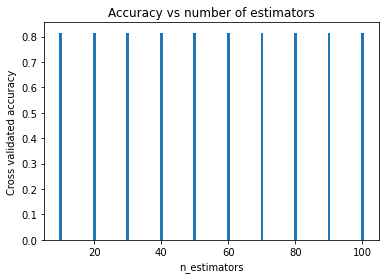

In [4]:
plt.bar(x_ax,np.mean(score1))
plt.xlabel('n_estimators')
plt.ylabel('Cross validated accuracy')
plt.title('Accuracy vs number of estimators')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=43, stratify=y)
clf = RandomForestClassifier(n_estimators=50, max_depth=None, random_state=0)    
clf.fit(X_train,y_train)
score.append(clf.score(X_test,y_test))
y_predict=clf.predict(X_test)
f1.append(f1_score(y_predict,y_test))
p_score.append(precision_score(y_predict,y_test))
recall.append(recall_score(y_predict,y_test))
    
print('mean accuracy with stratified k fold:',str(np.mean(score)))
print()
print('mean f1 score with stratified k fold:',str(np.mean(f1)))
print()
print('mean recall with stratified k fold:',str(np.mean(recall)))
print()
print('mean precision score with stratified k fold:',str(np.mean(p_score)))
print()
print('Out of sample score',clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

mean accuracy with stratified k fold: 0.815

mean f1 score with stratified k fold: 0.4499504459861249

mean recall with stratified k fold: 0.6579710144927536

mean precision score with stratified k fold: 0.34186746987951805

Out of sample score 0.815
[[2218  118]
 [ 437  227]]


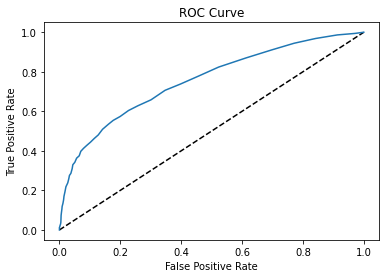

In [6]:
# ROC Curve


y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

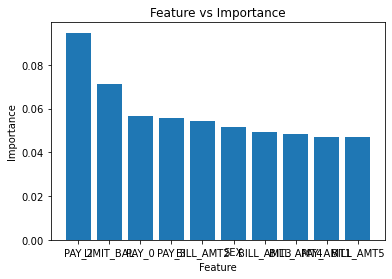

In [7]:
importances=[clf.feature_importances_,df.keys()[1:]]
importances=np.array(importances)
indicies=importances[0,:].argsort()
importances_sorted=importances[:,indicies[::-1]]

plt.bar(importances_sorted[1,0:10],importances_sorted[0,0:10])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature vs Importance')
plt.show()

In [8]:
print("My name is Prajwal Chinthoju")
print("My NetID is: pkc3")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Prajwal Chinthoju
My NetID is: pkc3
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
